In [1]:
import sklearn
import os
from os import path as op
from skimage import io
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// this cell fixes the scroll boxes that are otherwise quite irritating

<IPython.core.display.Javascript object>

In [3]:
path = "/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/"
valid_images = [".tif"]

def load_images(data_dir=path, ext='.tif'):
    training_files = os.listdir(data_dir)
    images = []
    file_names =[]
    for file in training_files:
        file_name, file_ext = os.path.splitext(file)
        if file_ext == ext:
            file_names.append(file)
#             images.append(io.imread(os.path.join(data_dir, file)))
    return [images, file_names]

def show_images(images):
    for img in images:
        img_show = plt.imshow(img)
        plt.show()
        
def show_image(image):
    img_show = plt.imshow(image)
    plt.show()
        
        
def save_images(images):
    for img in images:
        plt.savefig(img, dpi = 1200)

In [4]:
images_enh = load_images()
for file_name in images_enh[1]:
    print(os.path.join(path, file_name))
# show_images(images_enh[0])

/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Add MS 7474_0013.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Or 13006_0172.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Add MS 7474_0042.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Or 5593_0083.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Add MS 23494_0031.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Or 13006_0169.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Delhi Arabic 1901_0036.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Add MS 7474_0043.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Or 5593_0024.tif
/home/athanasiosskrepetos/Documents/Hackdays/RASM2018/Training_Data/Or 9202_0052.tif


RIGHT
Add MS 7474_0013
(8984, 6194, 3)


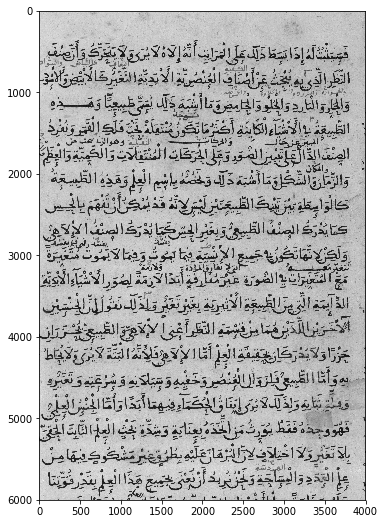

RIGHT
Or 13006_0172
(8566, 6088, 3)


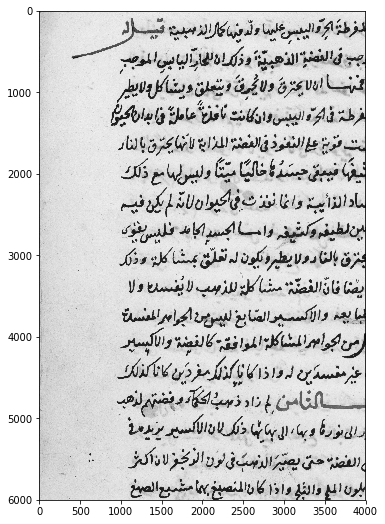

RIGHT


KeyboardInterrupt: 

In [5]:
def crop_img(img, scale_x=1.0, scale_y=1.0, pad_x_L=0.5, pad_x_R=0.5, pad_y_U=0.5, pad_y_D=0.5):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale_x, img.shape[0] * scale_y
    left_x, right_x = center_x - width_scaled * pad_x_L, center_x + width_scaled * pad_x_R
    top_y, bottom_y = center_y - height_scaled * pad_y_U, center_y + height_scaled * pad_y_D
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]
    return img_cropped

# need to press Q to close each popping window
def find_contours(img_path, page_orient='LEFT'):
    if not img_path:
        exit(1)
    cap = cv2.VideoCapture(img_path)
    color = (0,255,0)
    while (True):
        ret,image_full = cap.read()
        if image_full is not None:
            print(img_path.split('/')[-1].split('.')[0])
            print(image_full.shape)
            if page_orient == 'LEFT':
                # playing around these coords you can crop the frames.
                image = image_full[1000:8100, 800:5800] # right:left, up:down
            else:
                image = image_full[1000:7000, 500:4500] # up:down, right:left, 
            img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            plt.imshow(img, cmap='gray')
            plt.show()
            retth, mask = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY_INV)  
            img, contours, hier = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            for contour in contours:
                approx = cv2.approxPolyDP(contour, 4, False)
            cv2.drawContours(image, contours, -1, color, 2)
            resized_image = cv2.resize(image, (800, 900))
            cv2.imshow("window", resized_image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
right_img = ['Or 5593_0024', 'Add MS 7474_0013', 'Add MS 23494_0031', 'Or 13006_0169', 'Add MS 7474_0043', 'Or 5593_0024']
for file_name in images_enh[1]:
    if (val == file_name for val in right_img):
        print('RIGHT')
        find_contours(os.path.join(path, file_name), page_orient='RIGHT')
    else:
        print('RIGHT')
        find_contours(os.path.join(path, file_name), page_orient='LEFT')


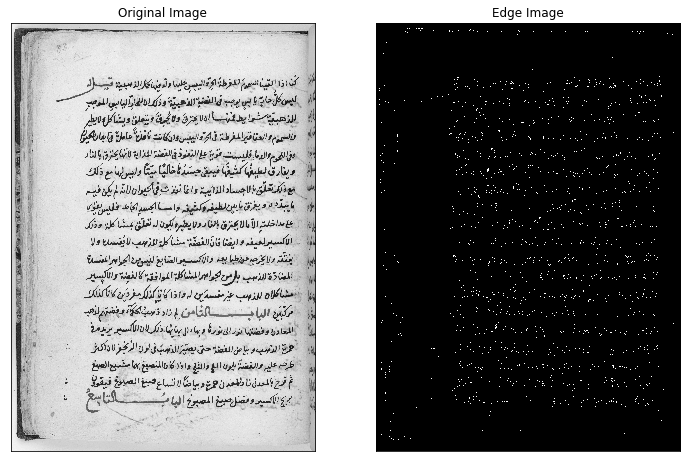

In [136]:
# CANNY 
edges = cv2.Canny(image_under,190,200)

plt.subplot(121),plt.imshow(image_under, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()